# Part II - (Ford GoBike-Tripdata Analysis)
## by (Aminat Owodunni)

## Investigation Overview


> I'm most interested in figuring out what features are best for predicting the what time of the day trips are taken, and the relationship between trip duration, user type and time of the day the trip is taken. 
> Male users are more than the other gender for both users_type. Female spend longer time on trips than male, while the other gender spends the most time. Users that are customers have a longer duration trip than subscribers, However, both users spend more time on weekends. Most trips are taken in the morning and afternoon, however,the trips are longer when started in the afternoon and evening. It can be observed that trips are taken in the morning on weekdays while trips are taken in the afternoon on weekends.

## Dataset Overview

> The data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. 
> There are 183,412 columns in the dataset with 16 features (```duration_sec```, ```start_time```, ```end_time```, ```start_station_id```, ```start_station_name```, ```start_station_latitude```, ```start_station_longitude```, ```end_station_id```, ```end_station_name```, ```end_station_latitude```, ```end_station_longitude```, ```bike_id```, ```user_type```, ```member_birth_year```, ```member_gender```, ```bike_share_for_all_trip```). 8265 data points were removed from the analysis due to missing information.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df=pd.read_csv('201902-fordgobike-tripdata.csv')

# Drop rows with null values
df.dropna(inplace=True)

# Create duration in minute column
df['duration_min'] = df['duration_sec']/60

# Create columns date, time_of_day, day, month, hour, min, sec.
df[['date','time_of_the_day']] = df.start_time.str.split(expand=True)
df[['time_of_day','secs']] = df.time_of_the_day.str.split(".",expand=True)
df['day'] =pd.to_datetime(df['start_time']).dt.day_name()
df['month'] =pd.to_datetime(df['start_time']).dt.month_name()
df[['hour','min','sec']] = df.time_of_day.str.split(":",expand=True)

# define function to create session column
def part_of_day(h):
    return (
        "morning"
        if 5 <= h <= 11
        else "afternoon"
        if 12 <= h <= 17
        else "evening"
        if 18 <= h <= 22
        else "night"
    )
for hour in range(0, 24):
    part = part_of_day(hour)
    
# convert start_time column to datetime
df['start_time']= pd.to_datetime(df['start_time'])

# convert hour column to int data type
df['hour']= df['hour'].astype(int)

# apply part_of_day to hour column
df['session'] = df['hour'].apply(part_of_day)

# Drop unnecessary columns
df.drop(['time_of_the_day','secs','sec','min'],axis=1,inplace=True)

## Distribution of Trip Duration

> The longest trip took 1409 minutes. The Trip duration distribution graph is skewed to the left. We can interpret from the plot above that majority of the user use the bike for short time duration (usually 10mins).

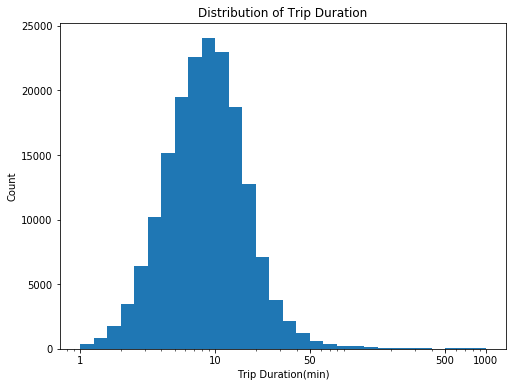

## Number of users by gender

>Males users are more than the other gender for both users_type

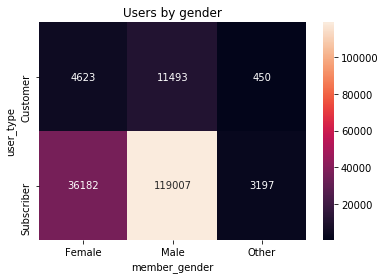

## Trip Session by Weekday

> It can be observed that trips are taken in the morning on weekdays while trips are taken in the afternoon on weekends


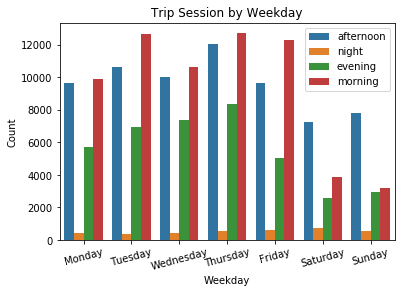

## Trip Duration by Session
> Trips are generally longer when started in the afternoon and evening

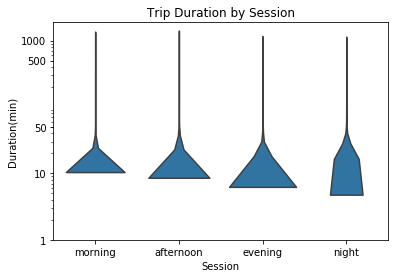

## Amont of time spent per day per User Type
> Customers spend more time than the subscribers. However both users spend more time on weekends.

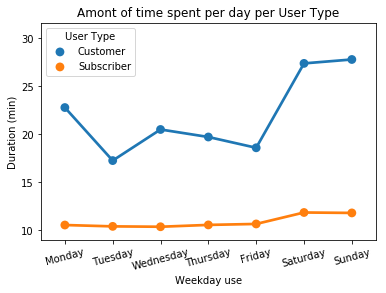

## Amount of time spent per day by Gender
> The pointplot above depicts that the female spend longer time on trips than male, while the other gender spends the most time.

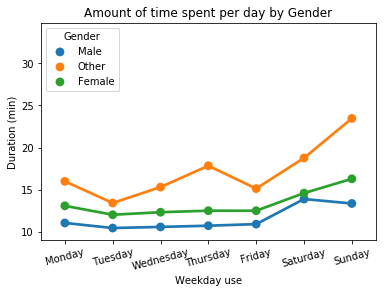

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_Ford_GoBike-Tripdata_slide_deck.ipynb --to slides --post serve --no-input --no-prompt